In [1]:
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"]})

In [2]:
t, t_f, t_go, V_c= sym.symbols('t t_f t_go V_c ')

In [3]:
q0 = sym.Function('q_0')(t)
lmbd = q0/(t_f - t)
lmbd

q_0(t)/(-t + t_f)

In [4]:
lmbd_dot = sym.diff(lmbd,t)
lmbd_dot

Derivative(q_0(t), t)/(-t + t_f) + q_0(t)/(-t + t_f)**2

In [5]:
N, T = sym.symbols('N T')
A = sym.Matrix([[0, 1, 0, 0, 0, 0, 0],
                [0, 0, -1, 0, 0, 0, 0],
                [0, 0, 0, 1 ,0, 0, 0],
                [0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 1],
                [N/(t_f-t)**2/T**5, N/(t_f-t)/T**5, -1/T**5, -5/T**4, -10/T**3,
                 -10/T**2, -5/T]])
A

Matrix([
[                     0,                   1,       0,       0,        0,        0,    0],
[                     0,                   0,      -1,       0,        0,        0,    0],
[                     0,                   0,       0,       1,        0,        0,    0],
[                     0,                   0,       0,       0,        1,        0,    0],
[                     0,                   0,       0,       0,        0,        1,    0],
[                     0,                   0,       0,       0,        0,        0,    1],
[N/(T**5*(-t + t_f)**2), N/(T**5*(-t + t_f)), -1/T**5, -5/T**4, -10/T**3, -10/T**2, -5/T]])

In [6]:
B = A.subs([(T,0.2),(t_f,10.),(N,3.5)])
B

Matrix([
[                     0,                  1,       0,       0,       0,      0,     0],
[                     0,                  0,      -1,       0,       0,      0,     0],
[                     0,                  0,       0,       1,       0,      0,     0],
[                     0,                  0,       0,       0,       1,      0,     0],
[                     0,                  0,       0,       0,       0,      1,     0],
[                     0,                  0,       0,       0,       0,      0,     1],
[109.375/(1 - 0.1*t)**2, 10937.5/(10.0 - t), -3125.0, -3125.0, -1250.0, -250.0, -25.0]])

In [7]:
B.transpose().subs(t,t_f-t_go)

Matrix([
[0,  0, 0, 0, 0, 0, 109.375/(-0.1*t_f + 0.1*t_go + 1)**2],
[1,  0, 0, 0, 0, 0,         10937.5/(-t_f + t_go + 10.0)],
[0, -1, 0, 0, 0, 0,                              -3125.0],
[0,  0, 1, 0, 0, 0,                              -3125.0],
[0,  0, 0, 1, 0, 0,                              -1250.0],
[0,  0, 0, 0, 1, 0,                               -250.0],
[0,  0, 0, 0, 0, 1,                                -25.0]])

In [8]:
q = sym.MatrixSymbol('q',7,1)
sym.Matrix(q)

Matrix([
[q[0, 0]],
[q[1, 0]],
[q[2, 0]],
[q[3, 0]],
[q[4, 0]],
[q[5, 0]],
[q[6, 0]]])

In [9]:
qdot = B*q
f = sym.Matrix(qdot)
type(f)

sympy.matrices.dense.MutableDenseMatrix

In [10]:
qdot

Matrix([
[                     0,                  1,       0,       0,       0,      0,     0],
[                     0,                  0,      -1,       0,       0,      0,     0],
[                     0,                  0,       0,       1,       0,      0,     0],
[                     0,                  0,       0,       0,       1,      0,     0],
[                     0,                  0,       0,       0,       0,      1,     0],
[                     0,                  0,       0,       0,       0,      0,     1],
[109.375/(1 - 0.1*t)**2, 10937.5/(10.0 - t), -3125.0, -3125.0, -1250.0, -250.0, -25.0]])*q

In [11]:
f = sym.lambdify((q,t),sym.Matrix(B*q))
v = np.ones((7,1))
f(v,2)

array([[ 1.00000000e+00],
       [-1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [-6.23691406e+03]])

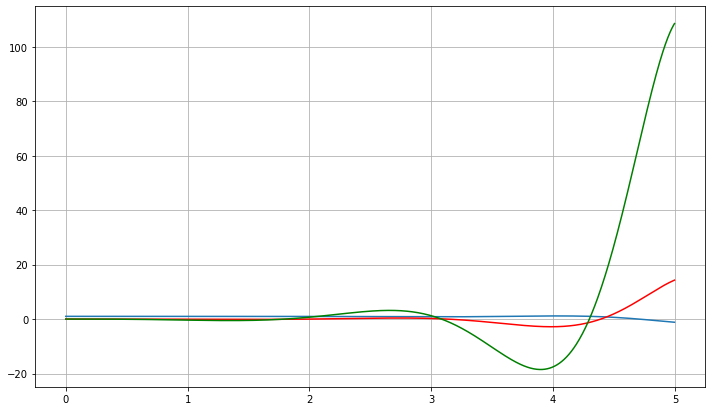

In [12]:
B = A.subs([(T,0.2),(t_f,10.),(N,5.)])
f = sym.lambdify((q,t),sym.Matrix(B*q))
Nsamp = 1000
Trun = 5
q = np.zeros((7,Nsamp), dtype=float)
q[0,0] = 1.
t = np.linspace(0, Trun, num=Nsamp, endpoint=False)
h = t[1]-t[0]
qnew = np.zeros(7)
qnew[0] = 1.

for i in range(Nsamp):
#    print(qnew.reshape((7,1)))
    q[:,i] = qnew.reshape(7)
#    print(q)
    qCol = qnew.reshape((7,1))
#    qCol.shape = (7,1)
    tk = t[i]
    K0 = f(qCol, tk)
    half_h = 0.5*h
    K1 = f(qCol + half_h*K0, tk + half_h)
    K2 = f(qCol + half_h*K1, tk + half_h)
    K3 = f(qCol + K2,        tk + h)
    qnew = qCol + (h/6)*(K0 + 2*K1 + 2*K2 + K3)
    

# print(q[0,:])
plt.figure(figsize=(12,7))
plt.plot(t,q[0,:])
plt.plot(t,q[1,:], color='r')
plt.plot(t,q[2,:], color='g')
# plt.plot(t,q[3,:], color='y')
plt.grid(True)


Text(0.5, 1.0, '$\\dot{\\lambda}$')

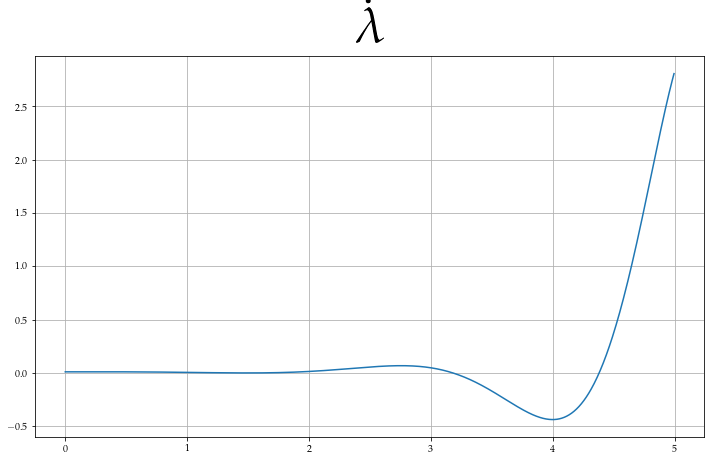

In [15]:
plt.figure(figsize=(12,7))
plt.plot(t,q[0,:]/(10-t)**2+q[1,:]/(10-t))
plt.grid(True)
plt.title(r'$\dot{\lambda}$',fontsize=50)


In [14]:
B

Matrix([
[                    0,                  1,       0,       0,       0,      0,     0],
[                    0,                  0,      -1,       0,       0,      0,     0],
[                    0,                  0,       0,       1,       0,      0,     0],
[                    0,                  0,       0,       0,       1,      0,     0],
[                    0,                  0,       0,       0,       0,      1,     0],
[                    0,                  0,       0,       0,       0,      0,     1],
[156.25/(1 - 0.1*t)**2, 15625.0/(10.0 - t), -3125.0, -3125.0, -1250.0, -250.0, -25.0]])